## Objective



This is a sample dataset which consists of 161297 drug name, condition
reviews and ratings from different patients and our goal is to examine by
analyzing the reviews, we can understand the drug effectiveness and its side
effects.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Start with basic EDA

In [2]:
df = pd.read_excel('drugsCom_raw.xlsx')

In [3]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [5]:
df.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,2014-12-13,116


In [6]:
df.shape


(161297, 7)

In [7]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


 Here useful count is -Highly skewed distribution, which is common in real-world data with "likes" or "helpful" counts.

So we will use log transformation to reduce the effect

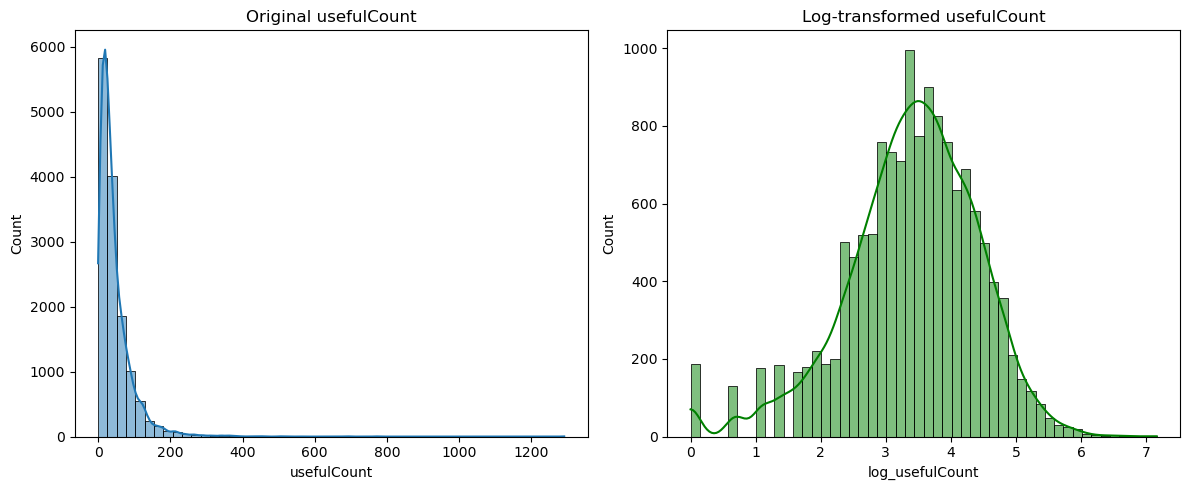

In [38]:
# Add a small constant to avoid log(0)
df_filtered['log_usefulCount'] = np.log1p(df_filtered['usefulCount'])

# Optional: Visualize the difference
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['usefulCount'], bins=50, kde=True)
plt.title('Original usefulCount')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['log_usefulCount'], bins=50, kde=True, color='green')
plt.title('Log-transformed usefulCount')
plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
df=df.fillna("NAN")

In [11]:
print(df.isnull().sum())

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [12]:
 (df['drugName'].nunique())

3436

In [13]:
# Show number of unique conditions
print(f"Number of Unique Conditions: {df['condition'].nunique()}")

# Show all unique conditions
print("\nUnique Conditions are:\n", df['condition'].unique())


Number of Unique Conditions: 885

Unique Conditions are:
 ['Left Ventricular Dysfunction' 'ADHD' 'Birth Control' 'Opiate Dependence'
 'Benign Prostatic Hyperplasia' 'Emergency Contraception'
 'Bipolar Disorde' 'Epilepsy' 'Migraine Prevention' 'Depression'
 "Crohn's Disease" 'Cough' 'Obesity' 'Urinary Tract Infection'
 'ibromyalgia' 'Chronic Myelogenous Leukemia' 'HIV Infection' 'Insomnia'
 'Rheumatoid Arthritis' 'Vaginal Yeast Infection' 'Chlamydia Infection'
 'Hirsutism' 'Panic Disorde' 'Migraine' 'NAN' 'Pain'
 'Irritable Bowel Syndrome' 'Osteoarthritis' 'Constipation'
 'Bowel Preparation' 'Psychosis' 'Muscle Spasm' 'Hepatitis C'
 'Overactive Bladde' 'Diabetes, Type 2' 'Asthma, Maintenance'
 'Non-Small Cell Lung Cance' 'Schizophrenia' 'Dysuria' 'Smoking Cessation'
 'Anxiety' 'Acne' 'emale Infertility' 'Constipation, Acute'
 'Constipation, Drug Induced' 'Erectile Dysfunction'
 'Trigeminal Neuralgia' 'Underactive Thyroid' 'Chronic Pain'
 'Atrophic Vaginitis' 'Skin and Structure Infectio

#### we're focusing only on 3 target conditions —

✅ Depression
✅ High Blood Pressure
✅ Diabetes, Type 2

In [ ]:
# Define target conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']

# Filter the dataset
filtered_data = data[data['condition'].isin(target_conditions)]

# Check the shape and distribution
print(f"Filtered Dataset Shape: {filtered_data.shape}")
print("\nCondition Distribution:\n")
print(filtered_data['condition'].value_counts())


Here I am terying to find the -

Are most ratings positive (7-10)?

Are there many negative ratings (1-4)?

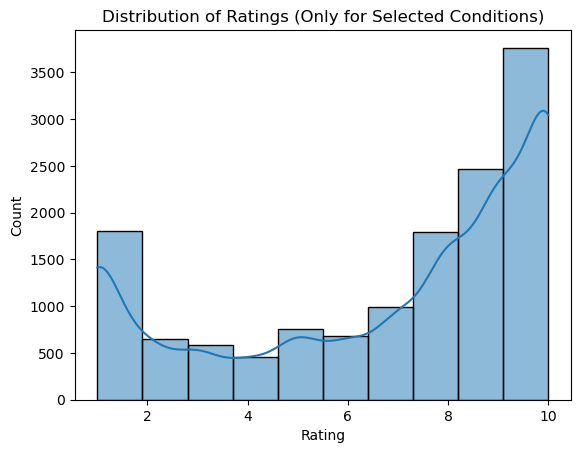

In [15]:
# First, filter only the 3 conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
df_filtered = df[df['condition'].isin(target_conditions)]

# Plot 1: Rating Distribution (only for 3 conditions)
sns.histplot(df_filtered['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings (Only for Selected Conditions)")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


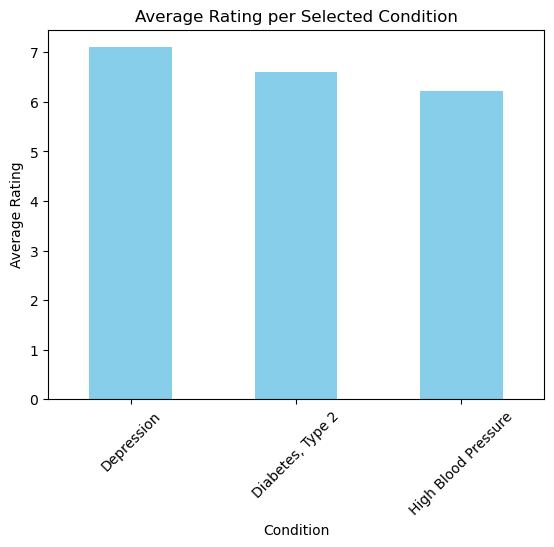

In [16]:

# Plot 2: Average Rating per Condition (only for 3 conditions)
df_filtered.groupby('condition')['rating'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Rating per Selected Condition')
plt.ylabel('Average Rating')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Depression only
depression_df = df_filtered[df_filtered['condition'] == 'Depression']

# Top rated drugs
top_drugs_depression = depression_df.groupby('drugName')['rating'].mean().sort_values(ascending=False).head(5)
print("Top Drugs for Depression:\n", top_drugs_depression)

# Lowest rated drugs
bottom_drugs_depression = depression_df.groupby('drugName')['rating'].mean().sort_values(ascending=True).head(5)
print("Lowest Rated Drugs for Depression:\n", bottom_drugs_depression)

Top Drugs for Depression:
 drugName
Niravam        10.0
Xanax XR       10.0
Maprotiline    10.0
Norpramin      10.0
Asendin        10.0
Name: rating, dtype: float64
Lowest Rated Drugs for Depression:
 drugName
Tryptophan    1.0
Vyvanse       3.0
Luvox CR      4.0
Pamelor       4.0
Oleptro       4.0
Name: rating, dtype: float64



Condition: Depression

Top 5 Drugs:
 drugName
Niacin          9.857143
Desipramine     9.857143
Serzone         9.800000
Tramadol        9.288462
Clomipramine    9.181818
Name: rating, dtype: float64


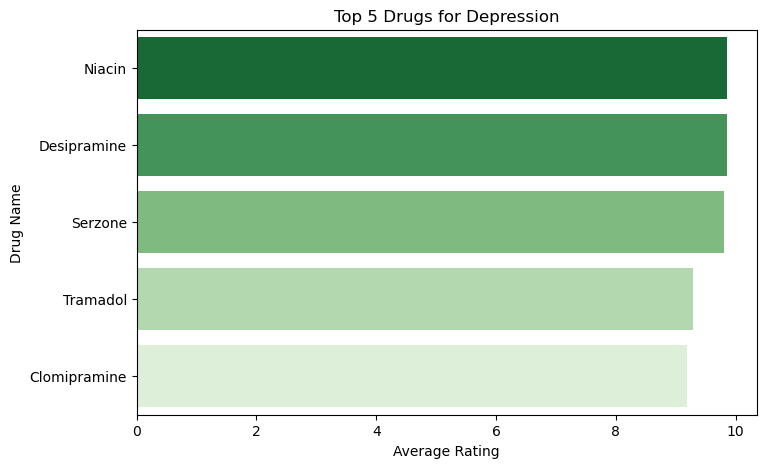


Bottom 5 Drugs:
 drugName
Fetzima            4.621622
Levomilnacipran    4.920000
Zyprexa            5.785714
Effexor            5.845361
Lithium            5.866667
Name: rating, dtype: float64


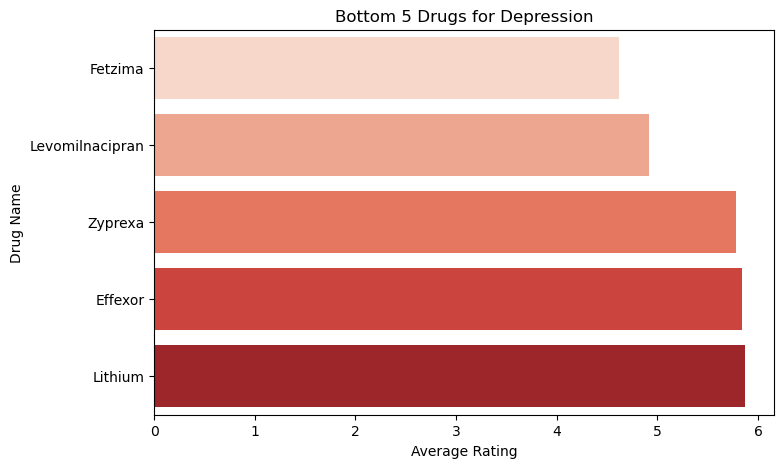


Sample Review for Best Drug (Niacin):

"I am amazed with the mental effects of Niacin. OK, I started taking it 5 weeks ago to lower my high cholesterol and Tryclicerides off the chart!!! I have been having energy like I had 20 years ago, positive attitude, motivated and I have been on every TCA and SSRI and SNRI and none worked. I feel 25 years younger. My fibro and arthritis is less noticeable, and after a heart attack 3 years ago and 3 stents put in, from December till June, I was having heart palpitations every day that concerned me. After a few days of 1gram of Niacin, for 3 weeks, not ONE heart palpitation whatsoever... This stuff is GREAT!!!!"

Sample Review for Worst Drug (Fetzima):

"My experience with this medication is terrible. I have moved up to 40 mg daily. I have had a rapid heart beat all day. The mood swings are terrible, running nose, the sweats, body aching, headache and just feel very irritable the dreams are more like nightmares. I  am not sure how they still marke

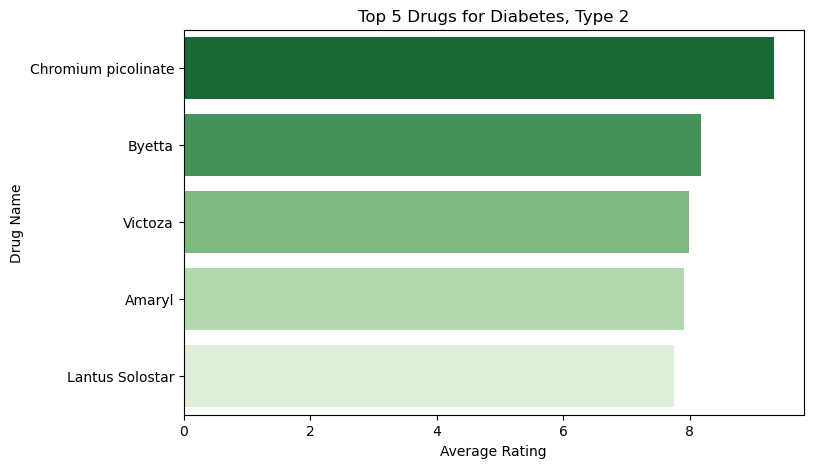


Bottom 5 Drugs:
 drugName
Colesevelam     3.600000
Albiglutide     4.111111
Linagliptin     4.333333
Pioglitazone    4.333333
Tradjenta       4.380952
Name: rating, dtype: float64


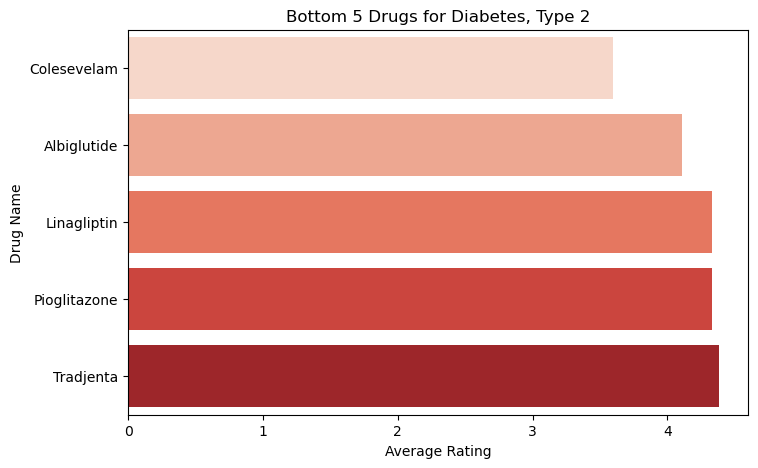


Sample Review for Best Drug (Chromium picolinate):

"Has lowered my blood sugar from 7.7% to 6% sometimes it is lower than this. It also stabilizes my blood sugar quickly."

Sample Review for Worst Drug (Colesevelam):

"Constipation, indigestion and weakness were all prominent."

Condition: High Blood Pressure

Top 5 Drugs:
 drugName
Bisoprolol                          9.400000
Hydrochlorothiazide / irbesartan    9.400000
Azor                                8.850000
Twynsta                             8.833333
Amlodipine / olmesartan             8.735294
Name: rating, dtype: float64


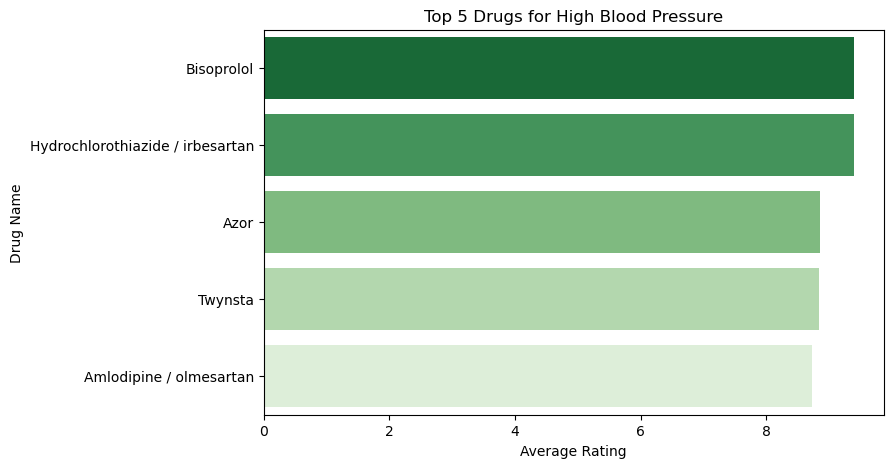


Bottom 5 Drugs:
 drugName
Hydralazine       3.363636
Carvedilol        3.821429
Coreg             3.888889
Prazosin          4.333333
Chlorthalidone    4.400000
Name: rating, dtype: float64


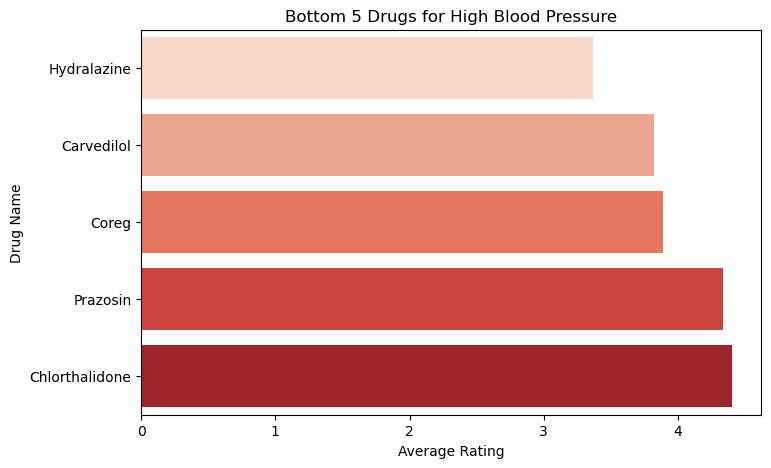


Sample Review for Best Drug (Bisoprolol):

"18 yo male here 
taking Bisoprolol  2x5 mg 
 Ramipril a 2.5mg 1x1 
Normal tension"

Sample Review for Worst Drug (Hydralazine):

"I started taking Hydralazine 25 mg approximately 4 weeks ago. Friday night while taking my hair down, I noticed quite a bit of my hair was falling out. When I got it all down, I realized it was short... boy short. I am so upset. I threw the medicine away. I&#039;ll just have to find something else to make my blood pressure go down. Gee whiz. "


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_bottom_drugs(condition_name, df_filtered):
    print(f"\n{'='*30}\nCondition: {condition_name}\n{'='*30}")

    # Filter condition-specific data
    condition_df = df_filtered[df_filtered['condition'] == condition_name]

    # Only consider drugs with at least 5 reviews
    drug_counts = condition_df['drugName'].value_counts()
    valid_drugs = drug_counts[drug_counts >= 5].index
    condition_df = condition_df[condition_df['drugName'].isin(valid_drugs)]

    # Group by drugName and calculate mean rating
    drug_rating = condition_df.groupby('drugName')['rating'].mean()

    # Top 5 Drugs
    top_drugs = drug_rating.sort_values(ascending=False).head(5)
    print("\nTop 5 Drugs:\n", top_drugs)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='Greens_r')
    plt.title(f"Top 5 Drugs for {condition_name}")
    plt.xlabel("Average Rating")
    plt.ylabel("Drug Name")
    plt.show()

    # Bottom 5 Drugs
    bottom_drugs = drug_rating.sort_values(ascending=True).head(5)
    print("\nBottom 5 Drugs:\n", bottom_drugs)

    plt.figure(figsize=(8,5))
    sns.barplot(x=bottom_drugs.values, y=bottom_drugs.index, palette='Reds')
    plt.title(f"Bottom 5 Drugs for {condition_name}")
    plt.xlabel("Average Rating")
    plt.ylabel("Drug Name")
    plt.show()

    # Sample Reviews
    top_drug_name = top_drugs.index[0]
    bottom_drug_name = bottom_drugs.index[0]

    print(f"\nSample Review for Best Drug ({top_drug_name}):\n")
    print(condition_df[condition_df['drugName'] == top_drug_name]['review'].iloc[0])

    print(f"\nSample Review for Worst Drug ({bottom_drug_name}):\n")
    print(condition_df[condition_df['drugName'] == bottom_drug_name]['review'].iloc[0])


# Now call for each condition
for condition in ['Depression', 'Diabetes, Type 2', 'High Blood Pressure']:
    plot_top_bottom_drugs(condition, df_filtered)

Below mentioned code will tell the length of the review and 

ind top common words (before cleaning)

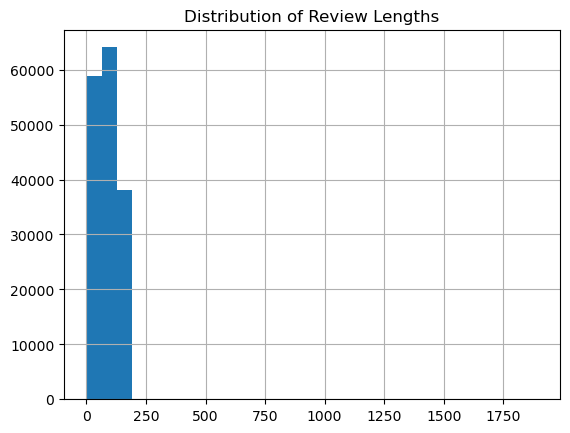

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('i', 670251), ('and', 429181), ('the', 403286), ('to', 320576), ('a', 286817), ('my', 285897), ('it', 241435), ('for', 199809), ('was', 173860), ('of', 170719), ('have', 170086), ('on', 132948), ('in', 122549), ('but', 120615), ('this', 119528), ('had', 112490), ('is', 111295), ('with', 103150), ('that', 97968), ('me', 89851)]


In [19]:
# Review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=30)
plt.title('Distribution of Review Lengths')
plt.show()

# Top 20 frequent words (before cleaning)
from collections import Counter
import nltk
nltk.download('punkt')

words = ' '.join(df['review']).lower().split()
common_words = Counter(words).most_common(20)
print(common_words)

#### Till Now Basic EDA is done-

Here we can the length of review, rating on the basis of condition, most used top words.Let's proceed with Cleansing part.

## Pre-Processing

We will perform following steps:-
**Lowercasing
**Remove punctuation and digits
**Remove stopwords (but keep important words like "no", "not" because they change meaning!)
**Lemmatization (important to reduce words to their base form)
**Remove extra spaces or HTML encoded characters

In [20]:
# Importing libraries 
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
# Download required resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Very important: remove "no" and "not" from stopwords
stop_words = stop_words - {'no', 'not'}

In [41]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove HTML tags and special characters
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'&[a-z]+;', ' ', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back
    text = ' '.join(words)
    
    return text

In [42]:
# Apply to your filtered dataset
df_filtered['clean_review'] = df_filtered['review'].apply(preprocess_text)

# Check sample
df_filtered[['review', 'clean_review']].head()

,review,clean_review
11,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...
31,"""1 week on Zoloft for anxiety and mood swings....",week zoloft anxiety mood swing take mg morning...
44,"""my gp started me on Venlafaxine yesterday to ...",gp started venlafaxine yesterday help depressi...
50,"""Hey Guys, It&#039;s been 4 months since my l...",hey guy month since last post wanted give mont...
67,"""This medicine saved my life. I was at my wits...",medicine saved life wit end anti depressant re...


In [43]:
print(df_filtered['clean_review'].isnull().sum())
print(df_filtered['clean_review'].str.len().describe())

0
count    13944.000000
mean       269.231426
std        146.510835
min          3.000000
25%        148.000000
50%        264.000000
75%        398.000000
max       1977.000000
Name: clean_review, dtype: float64


So now we will perform Vectorization here:
we preprocessed column: clean_review
Target variable: condition filtered to 3 classes

In [44]:
# Features and labels
X = df_filtered['clean_review']   # Text input (preprocessed)
y = df_filtered['condition']      # Target output (3 classes)

In [45]:
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=1,        # instead of 5
    max_df=0.95      # instead of 0.8
)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df_filtered['clean_review'])

print(X_tfidf.shape)
print(X_tfidf[0])

(13944, 11918)
  (0, 3399)	0.06987728651957488
  (0, 10569)	0.11606491937054597
  (0, 1048)	0.14144702327908237
  (0, 10651)	0.0880296849615352
  (0, 7664)	0.15910194764724195
  (0, 7063)	0.12873063093453307
  (0, 6087)	0.08975413221480431
  (0, 3967)	0.08077158618347607
  (0, 6779)	0.08118749465726977
  (0, 10386)	0.07700328323142959
  (0, 2731)	0.07766489445591152
  (0, 6259)	0.2759295822332959
  (0, 9480)	0.32858638220957725
  (0, 3036)	0.3140361587884482
  (0, 1054)	0.09725154026463763
  (0, 3559)	0.13055510385111502
  (0, 7387)	0.24875517341922732
  (0, 6339)	0.2948570173356099
  (0, 7094)	0.13371354160337726
  (0, 2712)	0.21606833696940192
  (0, 991)	0.15926179319617675
  (0, 7446)	0.12815373952357356
  (0, 2497)	0.14919952263395686
  (0, 6342)	0.1268643098001414
  (0, 224)	0.17574555879018866
  (0, 9312)	0.12628446343640226
  (0, 6738)	0.2050685999348343
  (0, 5277)	0.33441866686147215
  (0, 11833)	0.0768579004543145
  (0, 2725)	0.16414526380479283
  (0, 501)	0.1583132287244166


In [47]:
feature_names = tfidf.get_feature_names_out()
print([(feature_names[i], X_tfidf[0, i]) for i in X_tfidf[0].nonzero()[1]])

[('effect', 0.06987728651957488), ('thing', 0.11606491937054597), ('best', 0.14144702327908237), ('time', 0.0880296849615352), ('person', 0.15910194764724195), ('normal', 0.12873063093453307), ('like', 0.08975413221480431), ('feel', 0.08077158618347607), ('month', 0.08118749465726977), ('taking', 0.07700328323142959), ('depression', 0.07766489445591152), ('low', 0.2759295822332959), ('sinking', 0.32858638220957725), ('disposition', 0.3140361587884482), ('better', 0.09725154026463763), ('energy', 0.13055510385111502), ('overnight', 0.24875517341922732), ('major', 0.2948570173356099), ('noticed', 0.13371354160337726), ('deplin', 0.21606833696940192), ('began', 0.15926179319617675), ('pain', 0.12815373952357356), ('cymbalta', 0.14919952263395686), ('make', 0.1268643098001414), ('affect', 0.17574555879018866), ('severe', 0.12628446343640226), ('moderate', 0.2050685999348343), ('improvement', 0.33441866686147215), ('year', 0.0768579004543145), ('depressant', 0.16414526380479283), ('anti', 0

In [48]:
# Sum all TF-IDF values for each word across all documents
word_sum = np.asarray(X_tfidf.sum(axis=0)).flatten()

# Create a DataFrame to map words and their corresponding sum
word_sum_df = pd.DataFrame(list(zip(tfidf.get_feature_names_out(), word_sum)), columns=["Word", "Sum"])
word_sum_df = word_sum_df.sort_values(by="Sum", ascending=False)

# Display the top 10 words with highest TF-IDF sum
print(word_sum_df.head(10))

             Word         Sum
6606           mg  540.793848
2548          day  499.296529
3399       effect  492.297681
11578        week  436.925095
2731   depression  427.978830
11833        year  423.081979
10386      taking  422.738606
3967         feel  408.305537
6779        month  389.147720
6484   medication  351.588455


In [49]:
# Separate by condition
depression_reviews = df_filtered[df_filtered['condition'] == 'Depression']['clean_review']
bp_reviews = df_filtered[df_filtered['condition'] == 'High Blood Pressure']['clean_review']
diabetes_reviews = df_filtered[df_filtered['condition'] == 'Diabetes, Type 2']['clean_review']

In [50]:
# Function to get top TF-IDF terms
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def get_top_tfidf_words(corpus, label, top_n=15):
    tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(corpus)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    # Get mean TF-IDF for each term
    top_words = tfidf_df.mean().sort_values(ascending=False).head(top_n)
    return top_words

In [51]:
#Get top terms for each condition
depression_top = get_top_tfidf_words(depression_reviews, 'Depression')
bp_top = get_top_tfidf_words(bp_reviews, 'High Blood Pressure')
diabetes_top = get_top_tfidf_words(diabetes_reviews, 'Diabetes, Type 2')

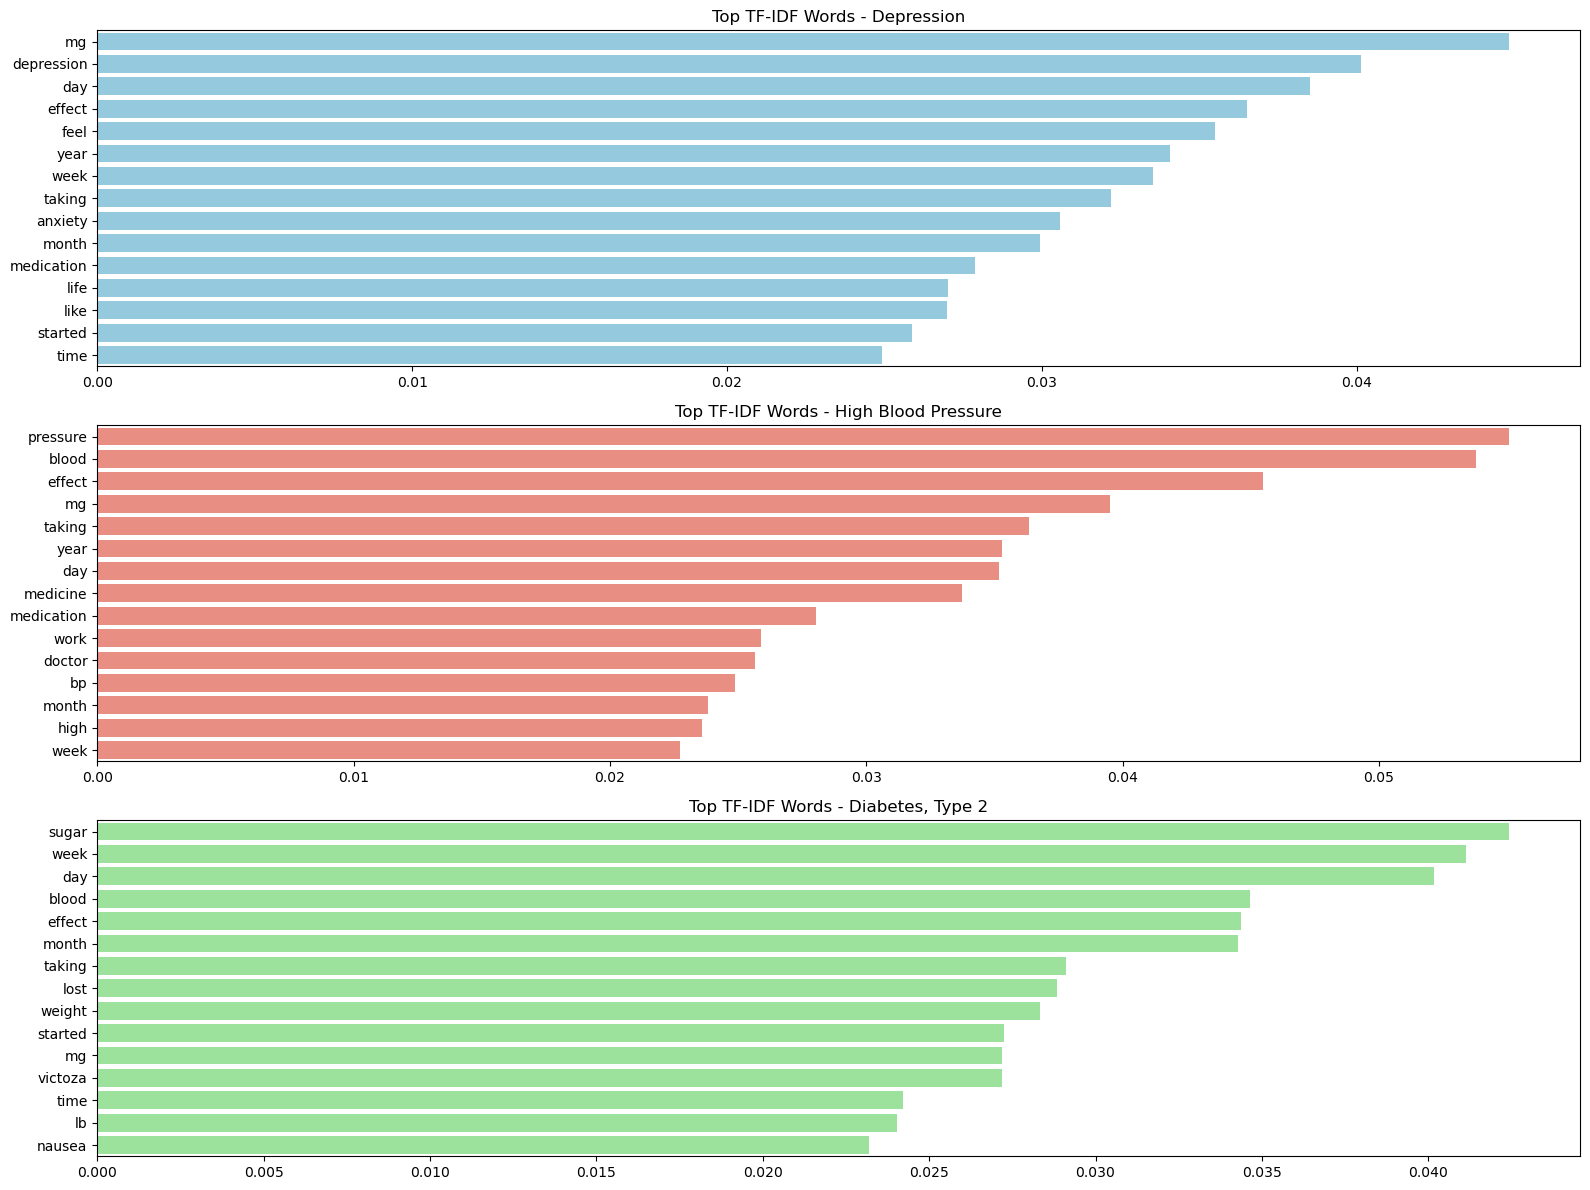

In [52]:
#Plot the keywords
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=depression_top.values, y=depression_top.index, color='skyblue')
plt.title('Top TF-IDF Words - Depression')

plt.subplot(3, 1, 2)
sns.barplot(x=bp_top.values, y=bp_top.index, color='salmon')
plt.title('Top TF-IDF Words - High Blood Pressure')

plt.subplot(3, 1, 3)
sns.barplot(x=diabetes_top.values, y=diabetes_top.index, color='lightgreen')
plt.title('Top TF-IDF Words - Diabetes, Type 2')

plt.tight_layout()
plt.show()


##### In above graph- You’ll get 3 horizontal bar plots showing the top 15 words most strongly associated with each condition based on TF-IDF scores. This gives you insight into what kinds of language patients use for each illness.

In [54]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_filtered['review'])
y = df_filtered['condition']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [57]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9544639655790605

Classification Report:
                      precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      1800
   Diabetes, Type 2       0.98      0.93      0.95       501
High Blood Pressure       0.96      0.84      0.90       488

           accuracy                           0.95      2789
          macro avg       0.96      0.92      0.94      2789
       weighted avg       0.96      0.95      0.95      2789



In [60]:
# Get top words for each condition
feature_names = tfidf.get_feature_names_out()
class_labels = model.classes_
coefs = model.coef_  # Shape: (n_classes, n_features)

for idx, label in enumerate(class_labels):
    print(f"\nTop words for class: {label}")
    top_indices = coefs[idx].argsort()[::-1][:10]
    for i in top_indices:
        print(f"{feature_names[i]}\t{coefs[idx][i]:.4f}")


Top words for class: Depression
depression	7.3002
anxiety	3.2890
pristiq	3.2653
mood	2.9591
wellbutrin	2.9466
zoloft	2.9314
lexapro	2.8267
cymbalta	2.7149
effexor	2.6211
prozac	2.5445

Top words for class: Diabetes, Type 2
sugar	6.1038
victoza	4.3236
a1c	4.1952
metformin	3.9946
injection	3.5493
trulicity	3.4116
sugars	3.3356
lost	3.2408
invokana	3.1754
numbers	2.7184

Top words for class: High Blood Pressure
pressure	6.7684
bp	5.1805
cough	3.5667
lisinopril	2.9405
blood	2.8748
bystolic	2.8341
benicar	2.6273
losartan	2.1753
amlodipine	2.1628
diovan	2.0906


In [61]:
!pip install textblob

     -------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [67]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to your DataFrame
df_filtered['sentiment_score'] = df_filtered['clean_review'].apply(get_sentiment)

# Define labels
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_filtered['sentiment_label'] = df_filtered['sentiment_score'].apply(label_sentiment)

df_filtered[['condition', 'drugName', 'sentiment_score', 'sentiment_label']].head()


,condition,drugName,sentiment_score,sentiment_label
11,Depression,L-methylfolate,0.252500,Positive
31,Depression,Sertraline,0.000000,Neutral
44,Depression,Venlafaxine,-0.071062,Neutral
50,"Diabetes, Type 2",Dulaglutide,0.210000,Positive
67,Depression,Effexor XR,0.185758,Positive


In [68]:
avg_sentiment = df_filtered.groupby(['condition', 'drugName'])['sentiment_score'].mean().reset_index()
avg_sentiment = avg_sentiment.sort_values(['condition', 'sentiment_score'], ascending=[True, False])

print(avg_sentiment.head(10))


     condition      drugName  sentiment_score
4   Depression     Amoxapine         0.400000
75  Depression     Risperdal         0.344333
44  Depression      Luvox CR         0.333333
45  Depression   Maprotiline         0.310606
43  Depression         Luvox         0.269444
47  Depression   Methylin ER         0.258958
22  Depression       Desyrel         0.257341
13  Depression  Budeprion XL         0.240622
69  Depression      Provigil         0.238542
53  Depression        Niacin         0.200886


In [69]:
sentiment_counts = df_filtered.groupby(['condition', 'drugName', 'sentiment_label']).size().unstack(fill_value=0)
print(sentiment_counts.head(10))

sentiment_label                              Negative  Neutral  Positive
condition  drugName                                                     
Depression Abilify                                 24       52        66
           Alprazolam                               8       23        30
           Amitriptyline                            4       12        22
           Amitriptyline / chlordiazepoxide         0        1         2
           Amoxapine                                0        0         2
           Anafranil                                2        2         1
           Aplenzin                                 0        2         2
           Aripiprazole                            21       58        72
           Armodafinil                              4        1         8
           Asendin                                  0        0         1


In [70]:
# Assuming your processed DataFrame is called df_filtered or df (whichever has these columns)
# Just make sure the DataFrame contains at least these columns:
columns_to_save = ['condition', 'drugName', 'sentiment_score', 'sentiment_label']

# Select these columns
df_to_save = df_filtered[columns_to_save]

# Save to CSV
df_to_save.to_csv('your_processed_data.csv', index=False)

print("CSV file 'your_processed_data.csv' created successfully.")


CSV file 'your_processed_data.csv' created successfully.
